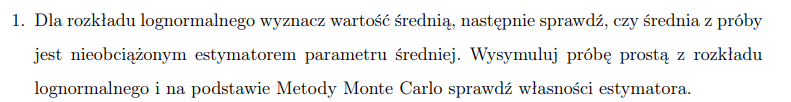

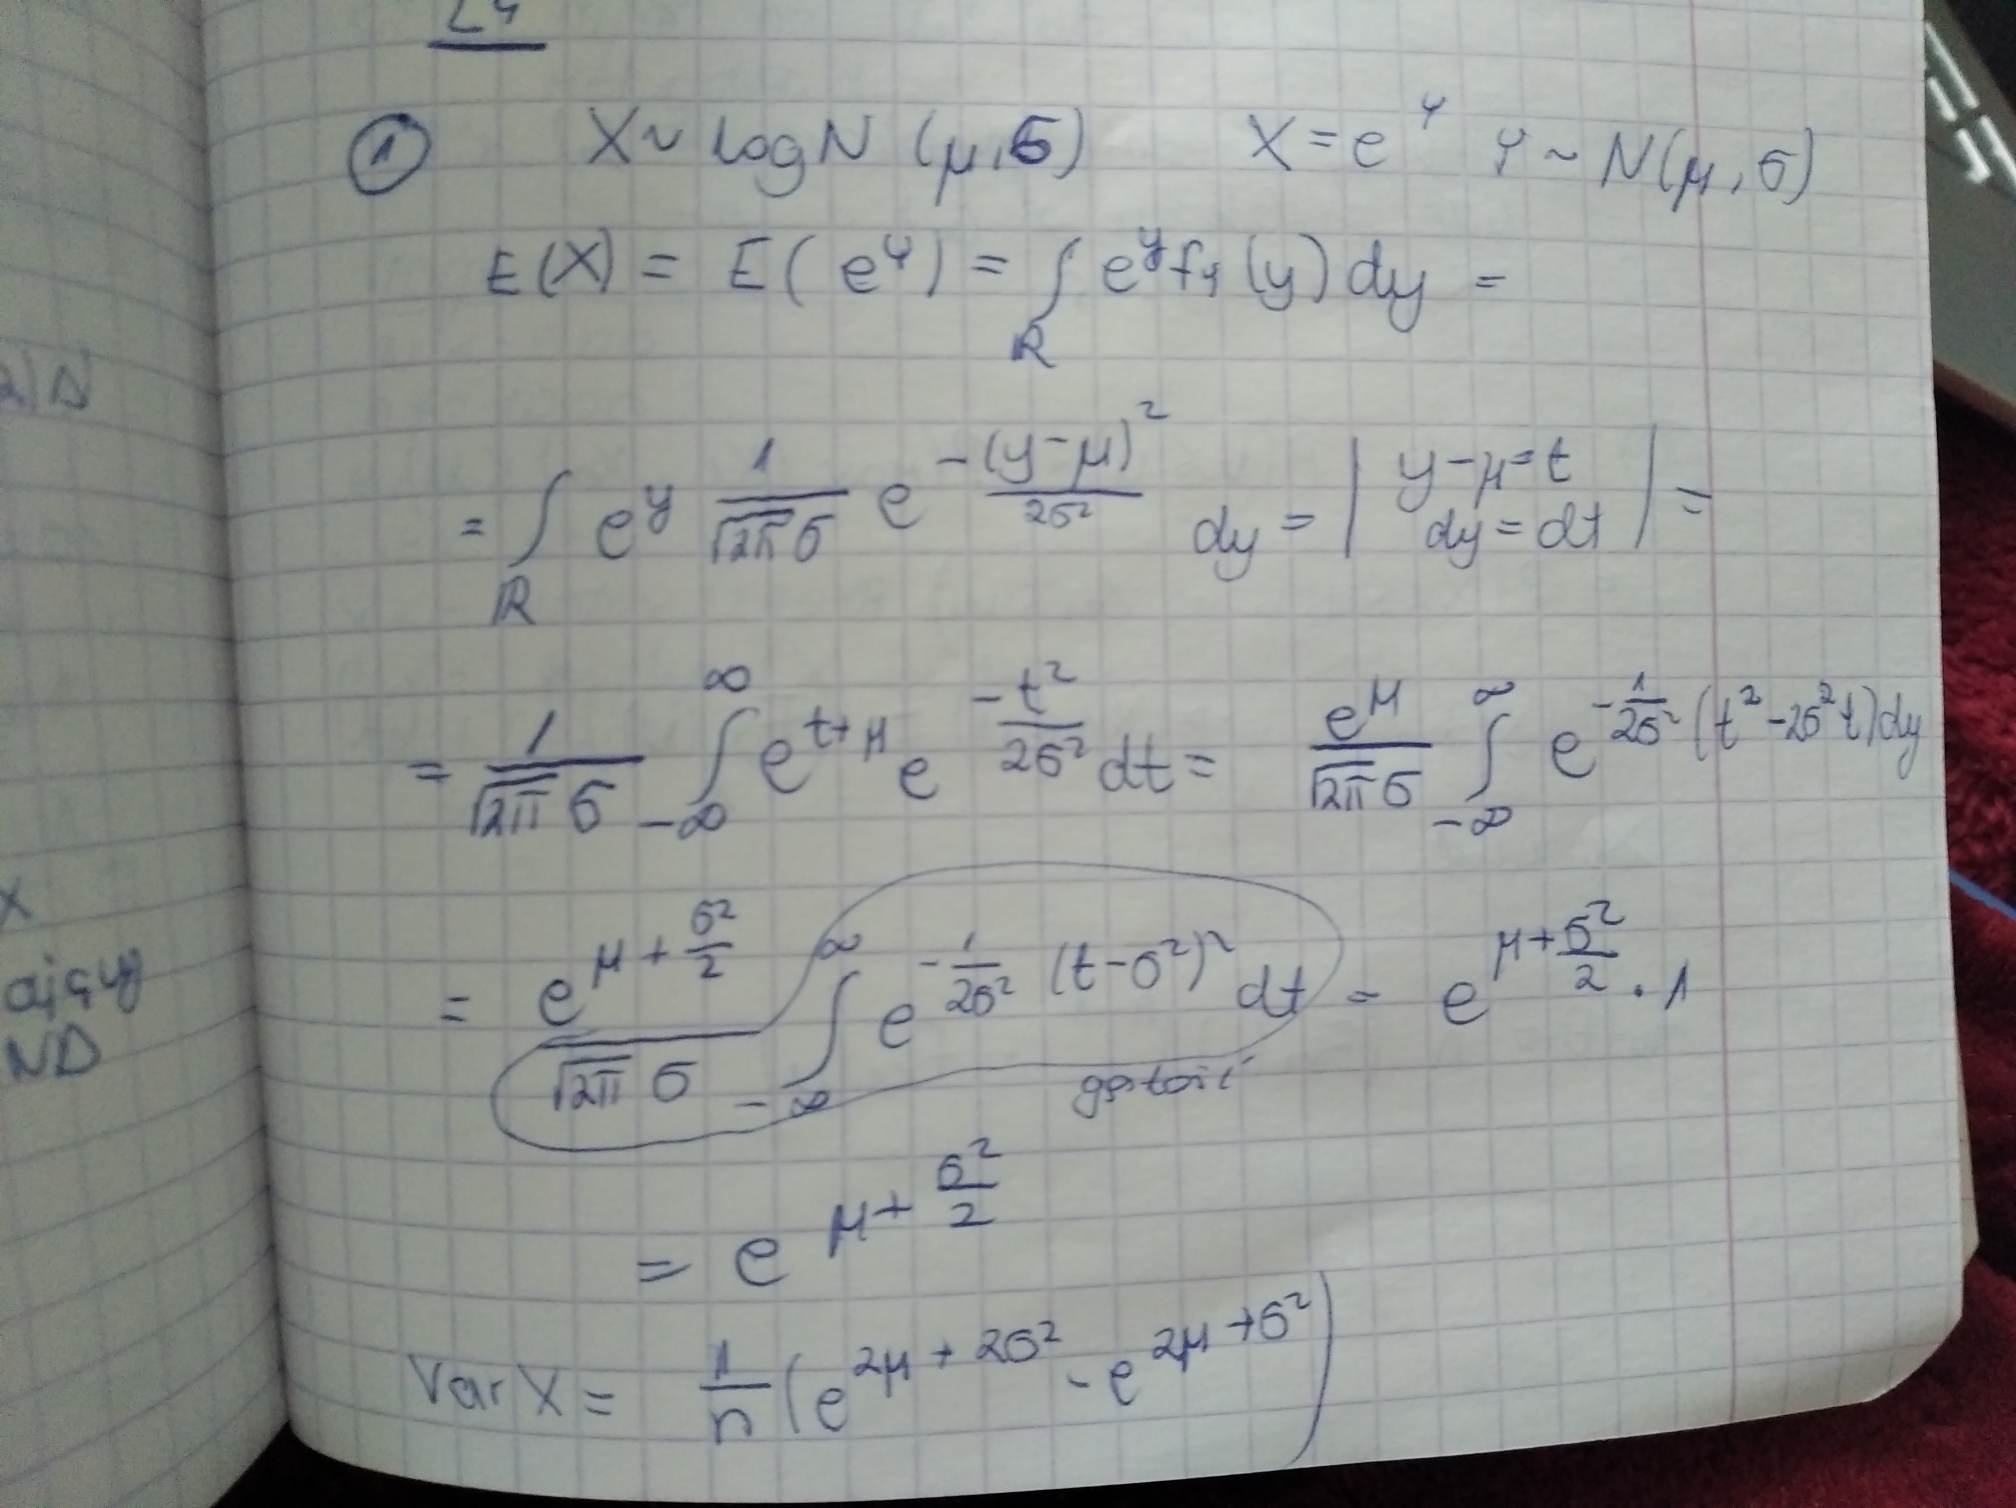

In [23]:
mi <- 2
sigma <- 1
n <- 1000

In [24]:
N = 500

In [25]:
X_sr <- numeric()
for (i in 1:N){
    Y <- rnorm(n ,mi, sigma)
    X <- exp(Y)
    X_sr[i] = 1/n * sum(X)
}

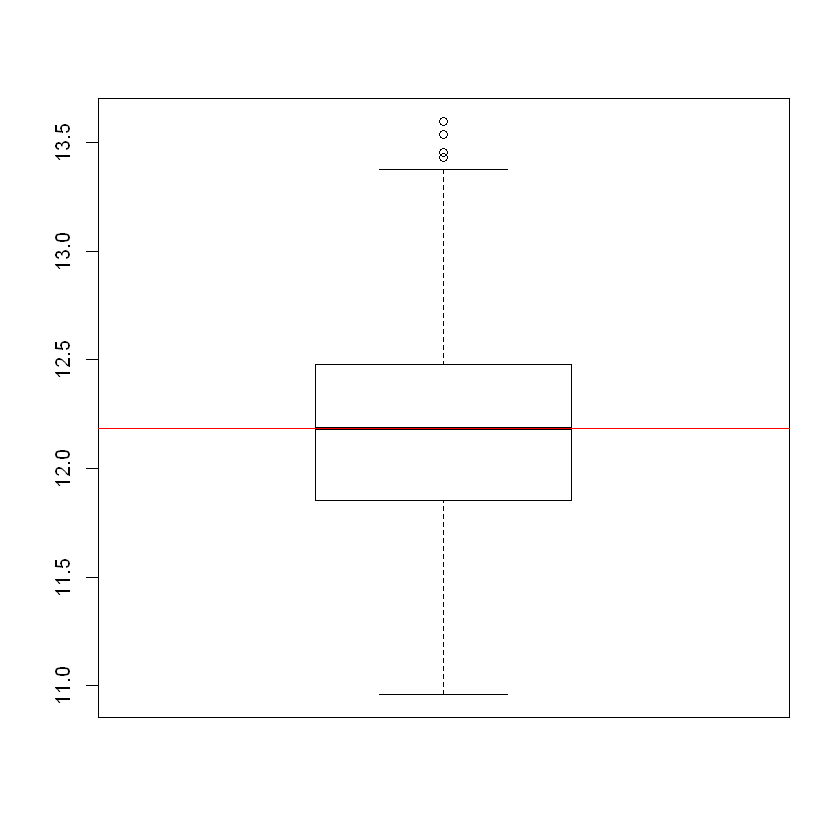

In [27]:
boxplot(X_sr)
abline(h = exp(mi+(sigma^2)/2), col = "Red")

In [28]:
mean(X_sr)

[1] 12.17704

In [29]:
exp(mi+(sigma^2)/2)

[1] 12.18249

In [30]:
var(X_sr)

[1] 0.2226117

In [31]:
(1/n)*(exp(2*mi+2*(sigma^2))-exp(2*mi+sigma^2))

[1] 0.2550156

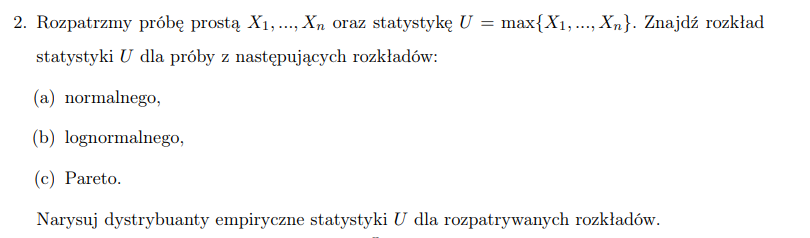

\begin{equation}
F_U(u) = P(U \leq u) = P(max(X_1, ..., X_n)) \leq u) = P(X_1 \leq u)...P(X_n \leq u) = (F_X(u))^n
\end{equation}

In [68]:
#a
mi <- 2
sigma <- 1
n <- 1000
N <- 500
U <- numeric()
for (i in 1:N){
    X <- rnorm(n, mi, sigma)
    U[i] = max(X)
}

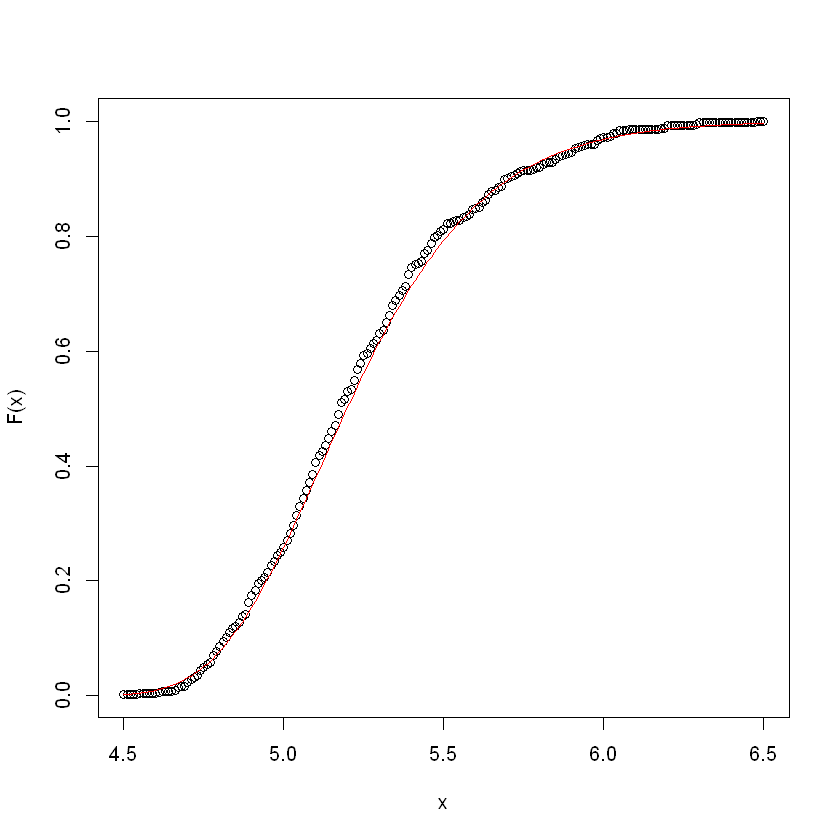

In [70]:
F <- ecdf(U)
x <- seq(4.5,6.5,0.01)
plot(x, F(x))
lines(x, (pnorm(x, mi, sigma))^n, col ='red')

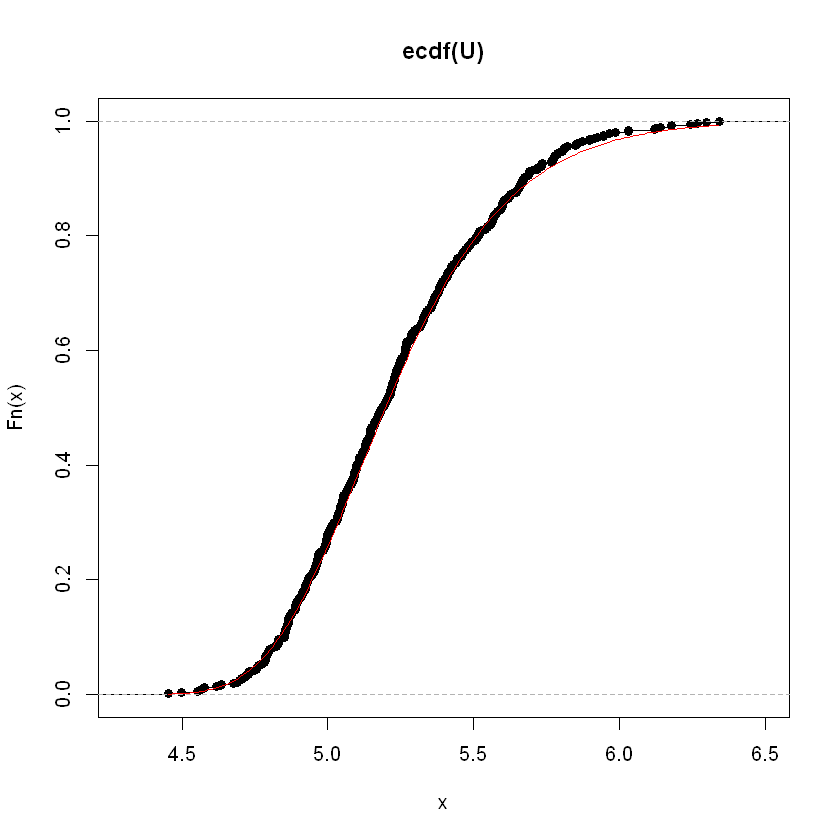

In [65]:
#inaczej
N <- 500
n <- 1000
mu <- 2
sigma <- 1
X <- matrix(rnorm(n*N, mu, sigma), ncol=N, nrow=n)
U <- apply(X, 2, max)
plot(ecdf(U))
x <- seq(min(U), max(U), 0.01)
lines(x, (pnorm(x, mu, sigma))^n, col='red')

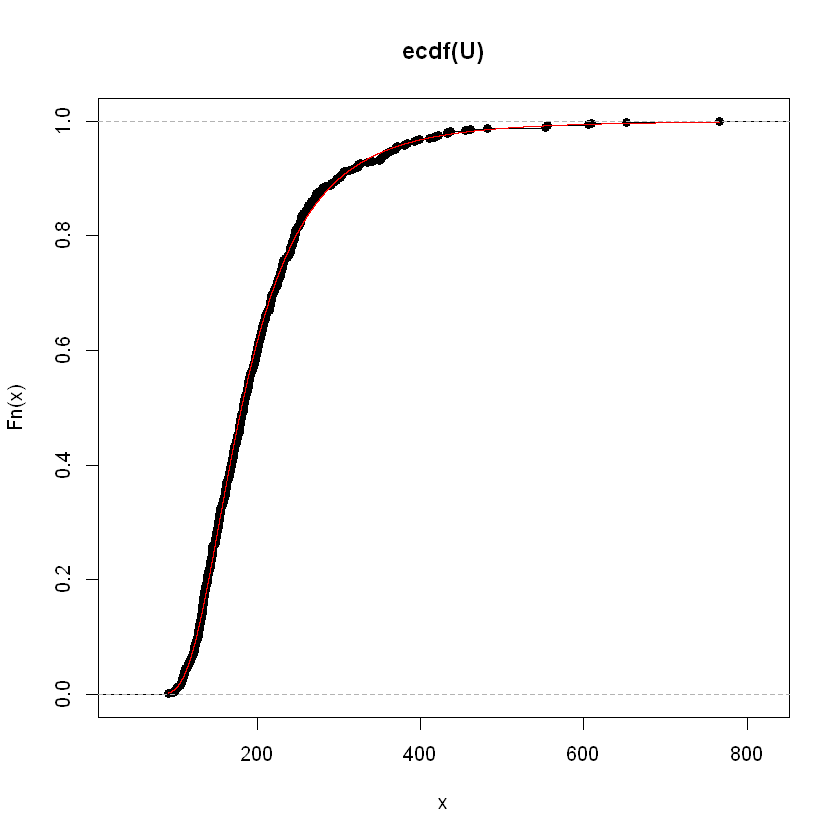

In [72]:
#b
N <- 500
n <- 1000
mu <- 2
sigma <- 1
X <- matrix(rlnorm(n*N, mu, sigma), ncol=N, nrow=n)
U <- apply(X, 2, max)
plot(ecdf(U))
x <- seq(min(U), max(U), 0.01)
lines(x, (plnorm(x, mu, sigma))^n, col='red')

In [77]:
#c
pareto.rv <- function(n, lambda, alfa){
  X <- lambda*(runif(n))^(-1/alfa)-lambda
  return(X)
}

In [78]:
lambda <- 1
alfa <- 3
N <- 500
n <- 1000

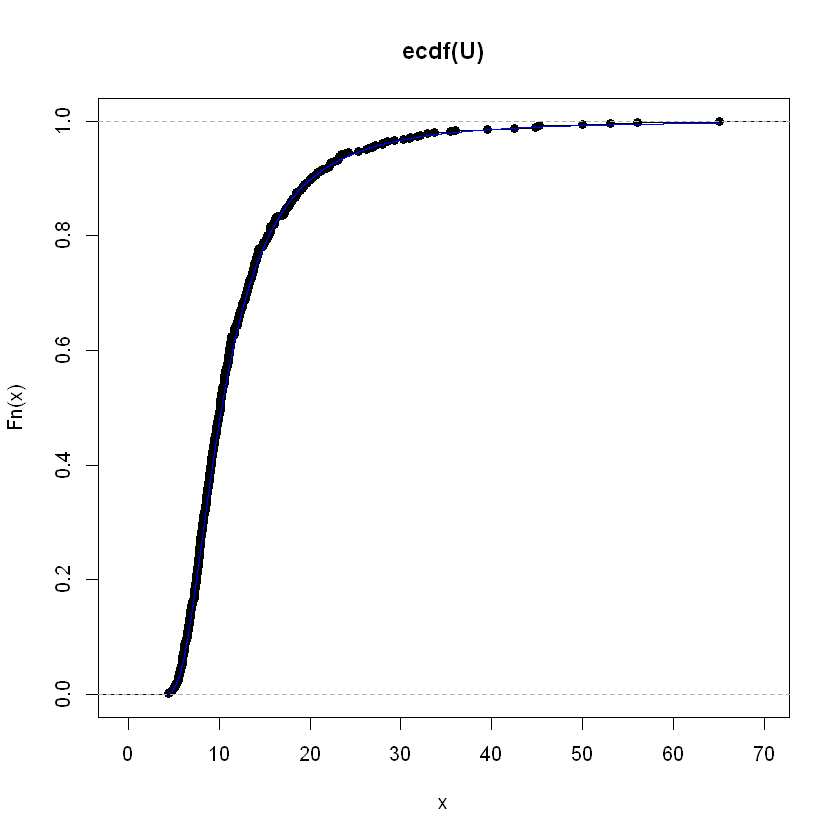

In [82]:
X <- matrix(pareto.rv(n*N, lambda, alfa), ncol=N, nrow=n)
U <- apply(X, 2, max)
plot(ecdf(U))
x <- seq(min(U), max(U), 0.01)
F1 <- 1-(1/(1+x))^3
lines(x, F1^n, col='blue')

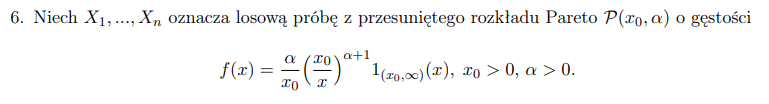

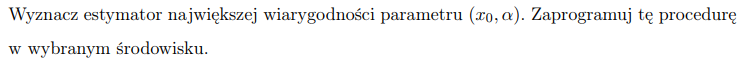

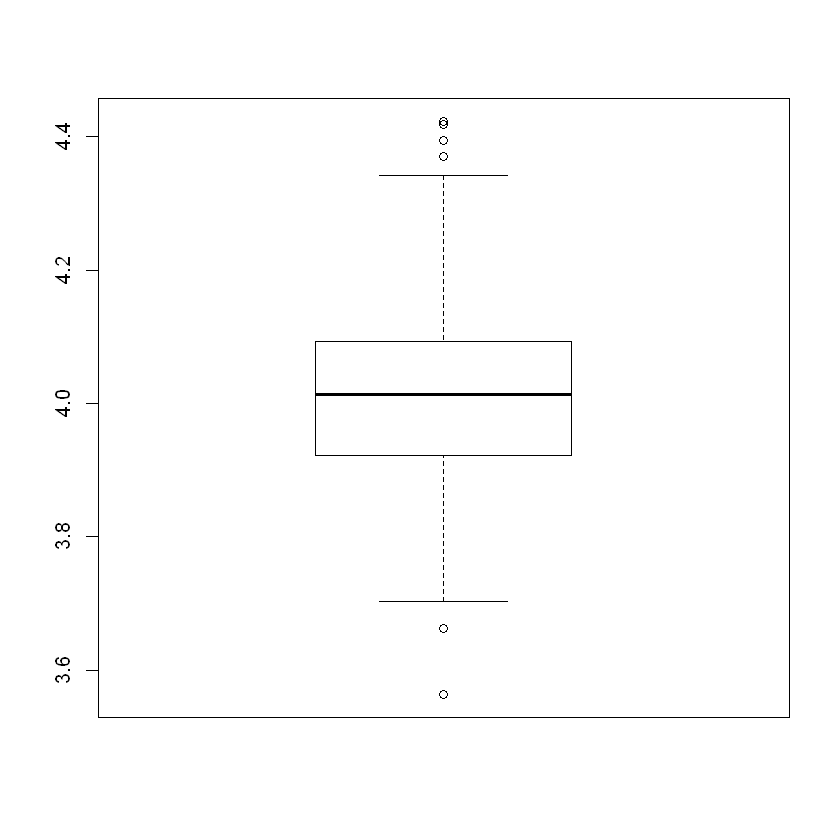

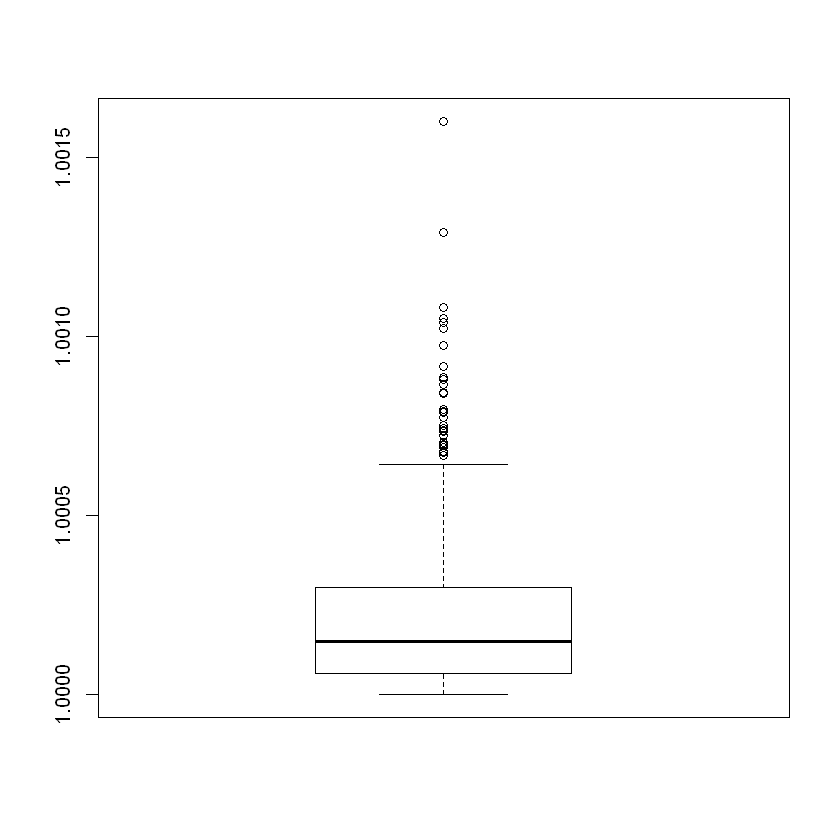

In [4]:
x0 <- 1
alfa <- 4
n <- 1000
N <- 500

pareto.rv <- function(x0, alfa, n){
  U <- runif(n)
  X <- x0/(U^(1/alfa))
}

esty_x0 <- numeric()
esty_alfa <- numeric()
#pareto_wektor <- pareto.rv(x0, alfa, n)
#sum(log(pareto_wektor))
for (i in seq(1,N,1)){
  pareto_wektor <- pareto.rv(x0, alfa, n)
  esty_x0[i] <- min(pareto_wektor)
  esty_alfa[i] <- -n/(-sum(log(pareto_wektor)) + n*log(min(pareto_wektor)))
}

boxplot(esty_alfa)
boxplot(esty_x0)

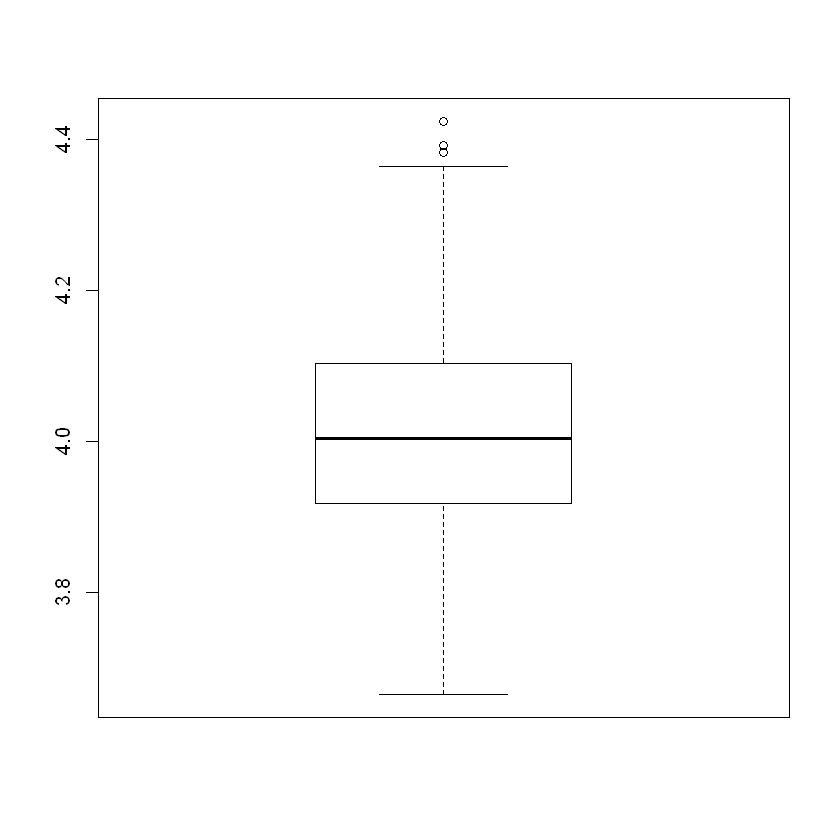

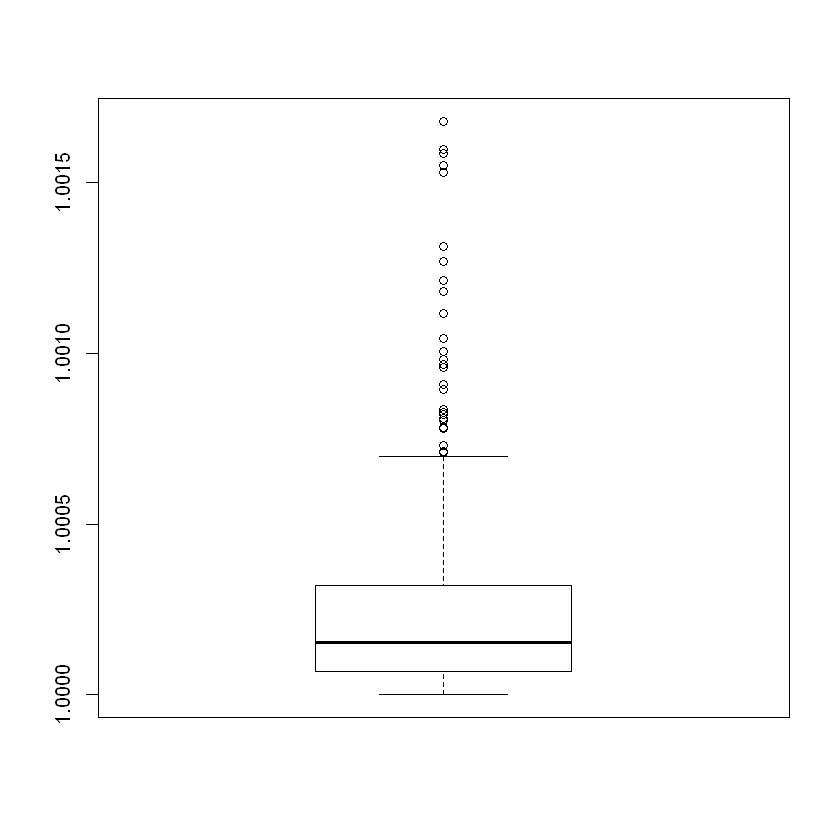

In [1]:
#drugi sposob, chyba lepszy
n <- 1000
x0 <- 1
alfa <- 4

pareto.rv <- function(alfa, x0, n){
  X <- runif(n)
  Y <- ((1-X)^(-1/alfa)*x0)
  return(Y)
}

estymator <- function(X){
  x0 <- min(X)
  n <- length(X)
  alfa <- (-1)*length(X)/(n*log(x0)-sum(log(X)))
  return(c(x0, alfa))
}

par_alfa <- numeric()
par_x0 <- numeric()
for(i in 1:500){
  X <- pareto.rv(alfa,x0,n)
  k <- estymator(X)
  par_alfa[i] <- k[2]
  par_x0[i] <- k[1]
}

boxplot(par_alfa)
boxplot(par_x0)

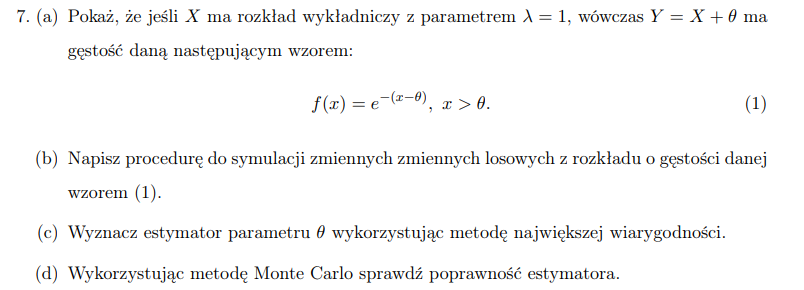

In [11]:
#b
zad_7 <- function(n, theta){
    X <- rexp(n, 1)
    Y <- X + theta
    return(Y)
    }

\begin{equation}
L(\theta) = \prod_{i=1}^{n} e^{-(t_i-\theta)}
\end{equation}

\begin{equation}
\ln L(\theta) = \sum_{i=1}^n \ln(e^{-(t_i-\theta)}) = \sum_{i=1}^n (-t_i+\theta) = -\sum_{i=1}^n t_i + n \theta
\end{equation}

\begin{equation}
\frac{d \ln L(\theta)}{d \theta} = n, \qquad \theta = min(t_1,...t_n)
\end{equation}

In [13]:
th <- function(X)
    return(min(X))

In [20]:
l <- numeric()
for (n in 1:1000){
    l[n] = th(zad_7(100,3))
}

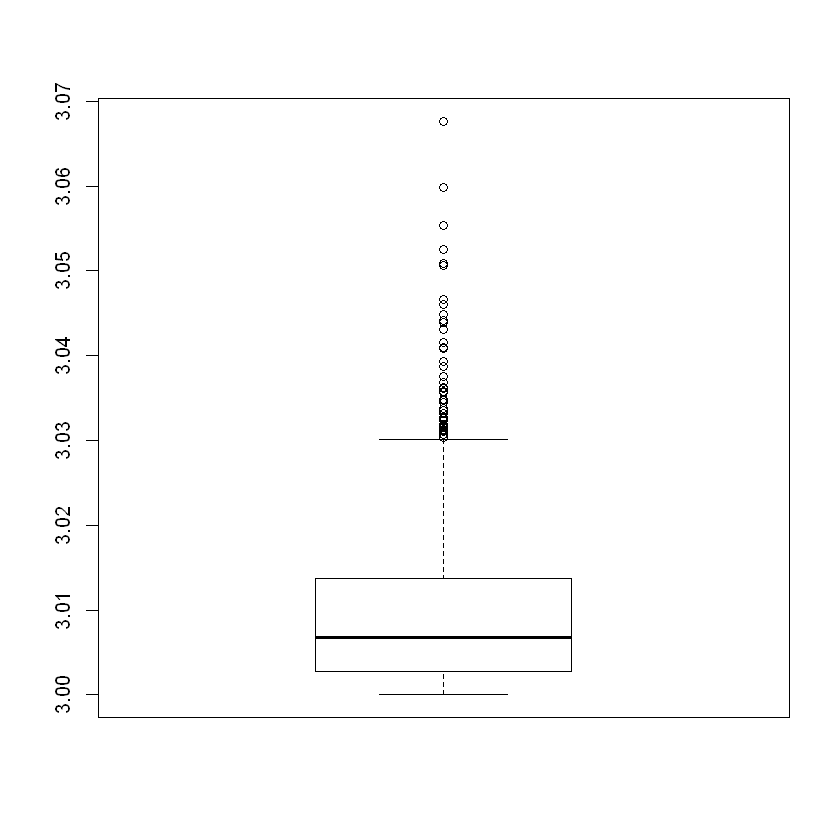

In [21]:
boxplot(l)

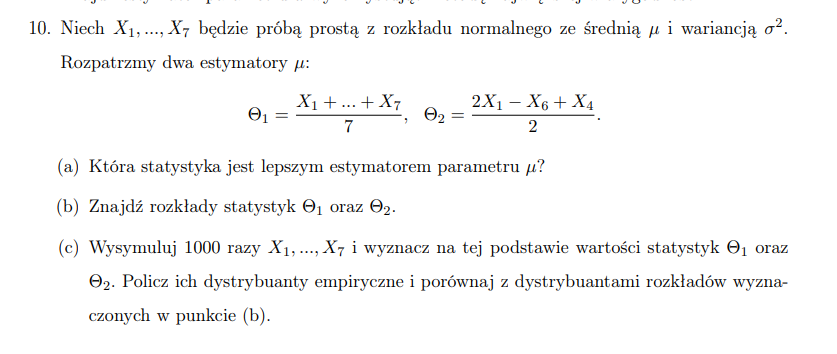

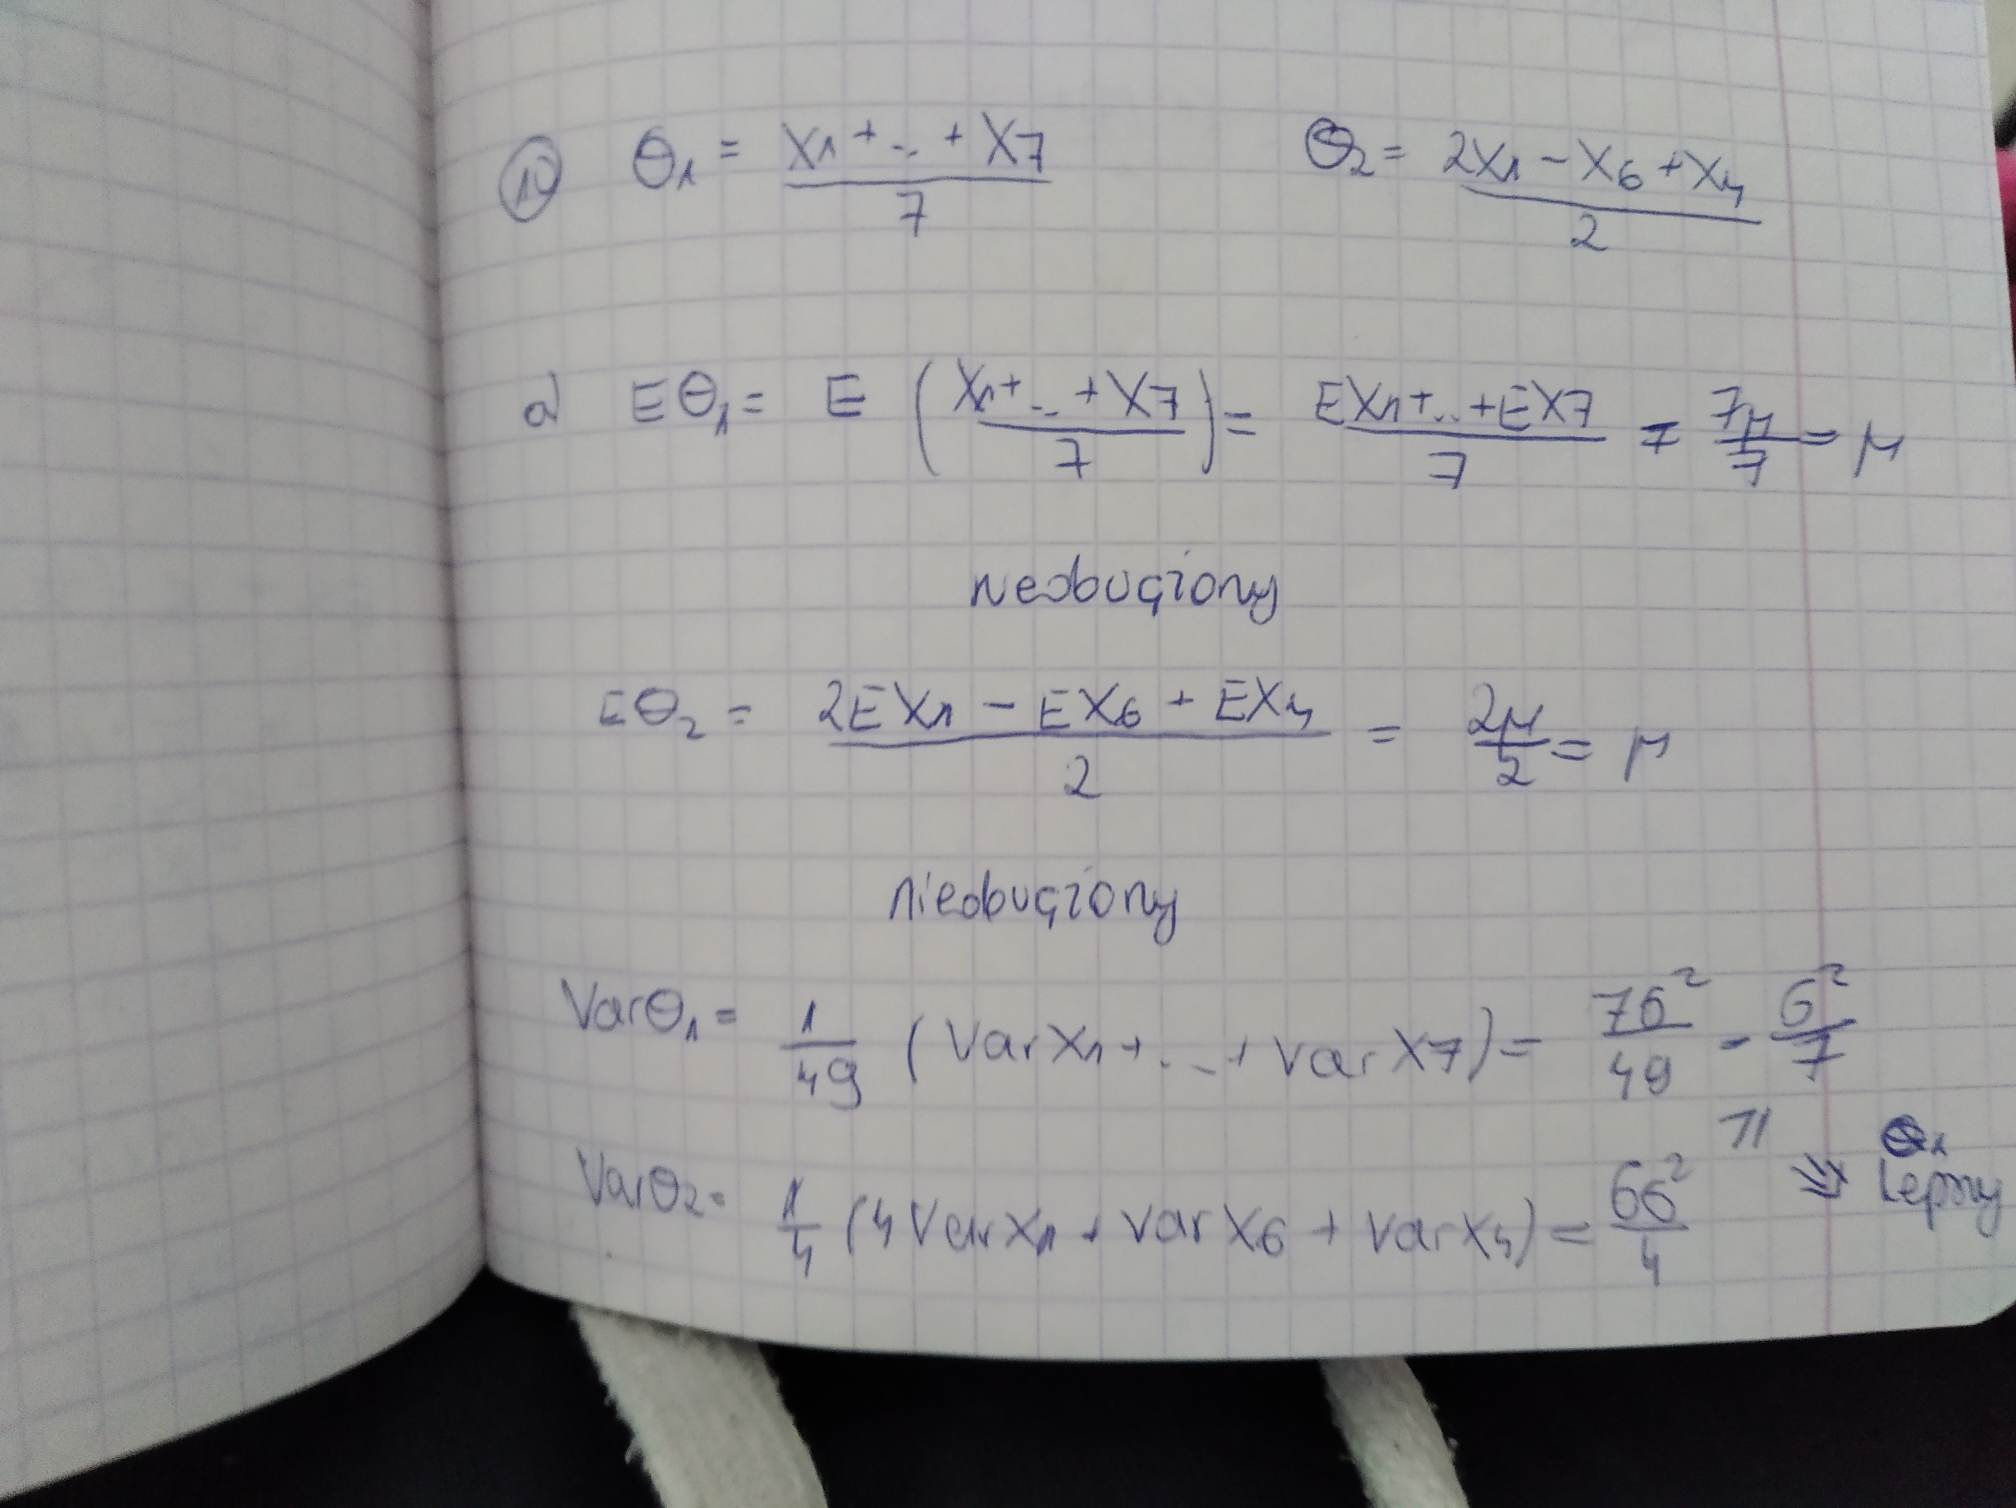

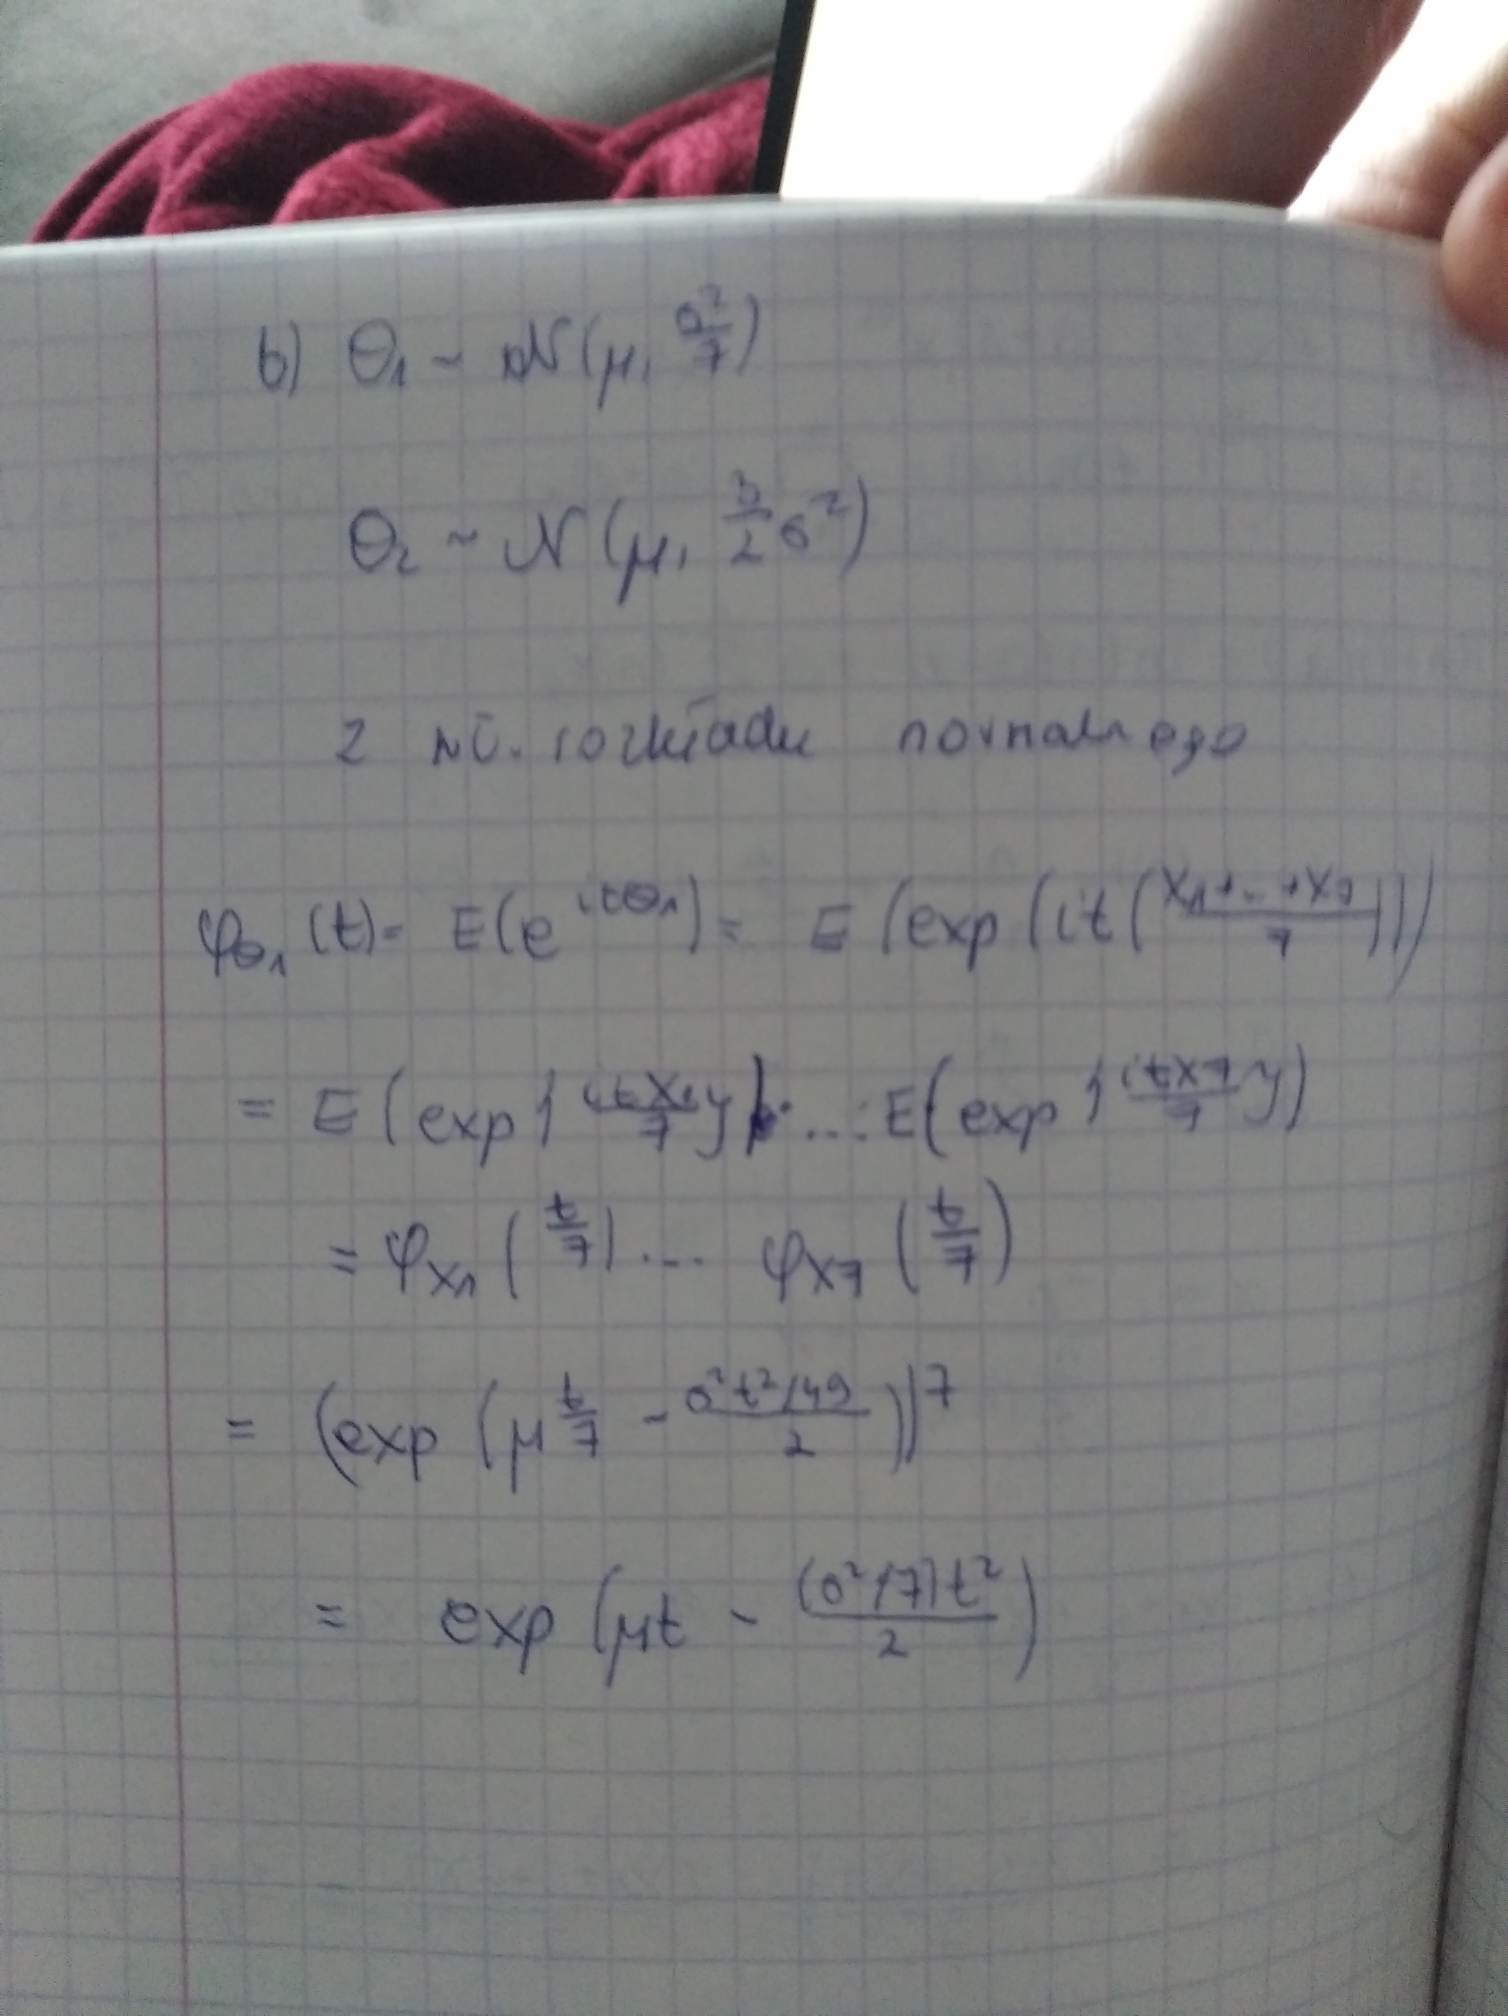

In [28]:
Q1_vec <- numeric()
Q2_vec <- numeric()
mi <- 2
sigma <- 1
for (n in 1:1000){
    X <- rnorm(7, mi, sigma)
    Q1 <- sum(X)/7
    Q2 <- (2*X[1]-X[6]+X[4])/2
    Q1_vec[n] <- Q1
    Q2_vec[n] <- Q2
    }

In [49]:
Q1_teor <- rnorm(mi, sigma/sqrt(7))
Q2_teor <- rnorm(mi, sqrt((3/2))*sigma)

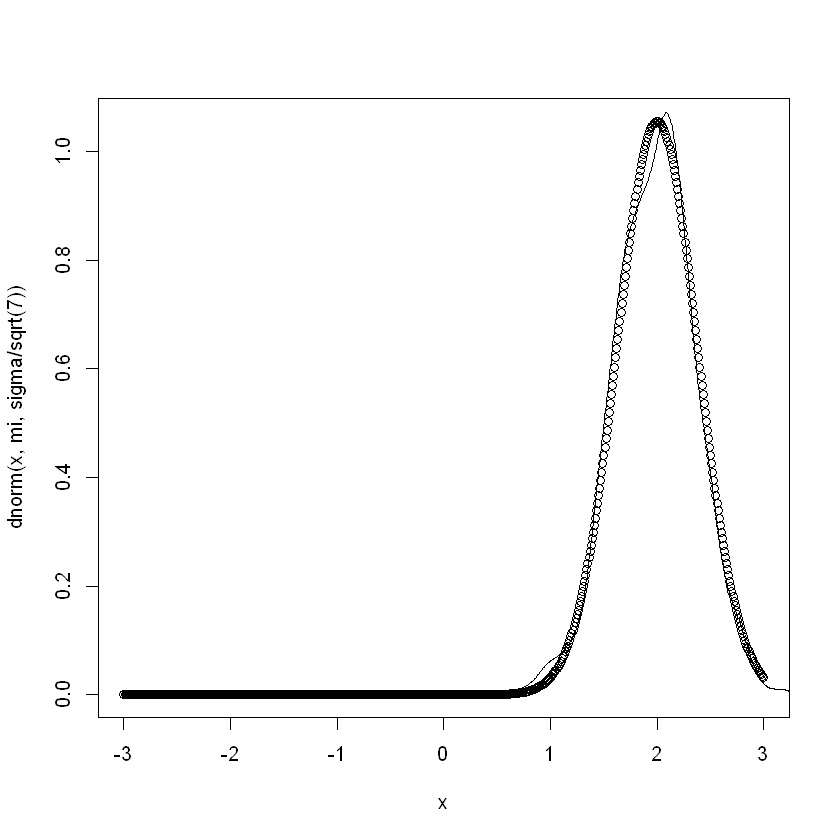

In [54]:
x <- seq(-3,3, 0.01)
plot(x, dnorm(x, mi, sigma/sqrt(7)))
lines(density(Q1_vec))

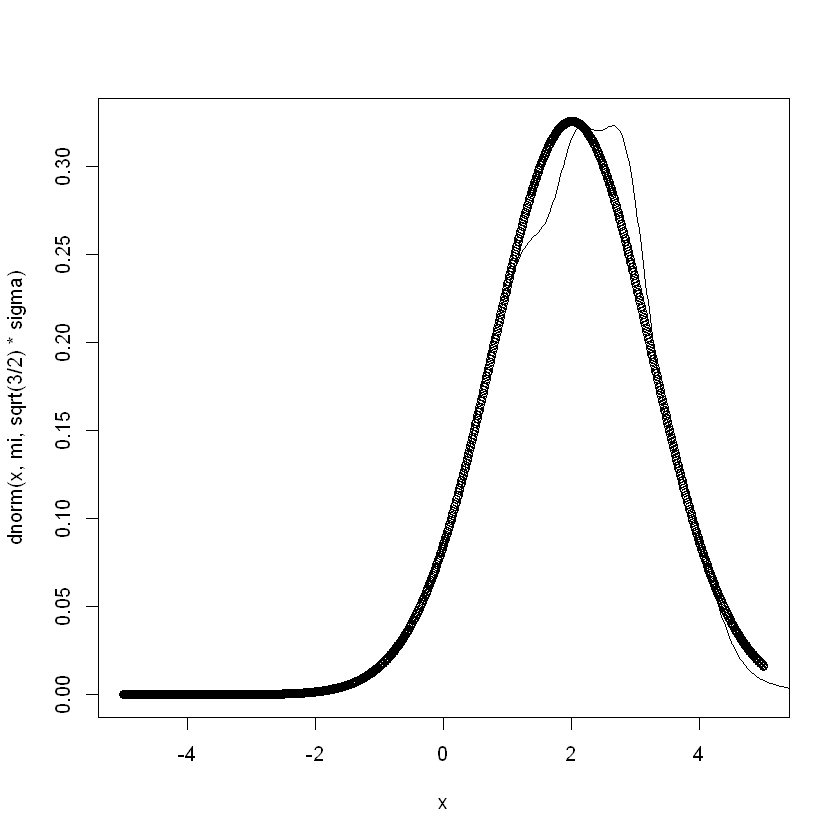

In [56]:
x <- seq(-5,5, 0.01)
plot(x, dnorm(x, mi, sqrt(3/2)*sigma))
lines(density(Q2_vec))

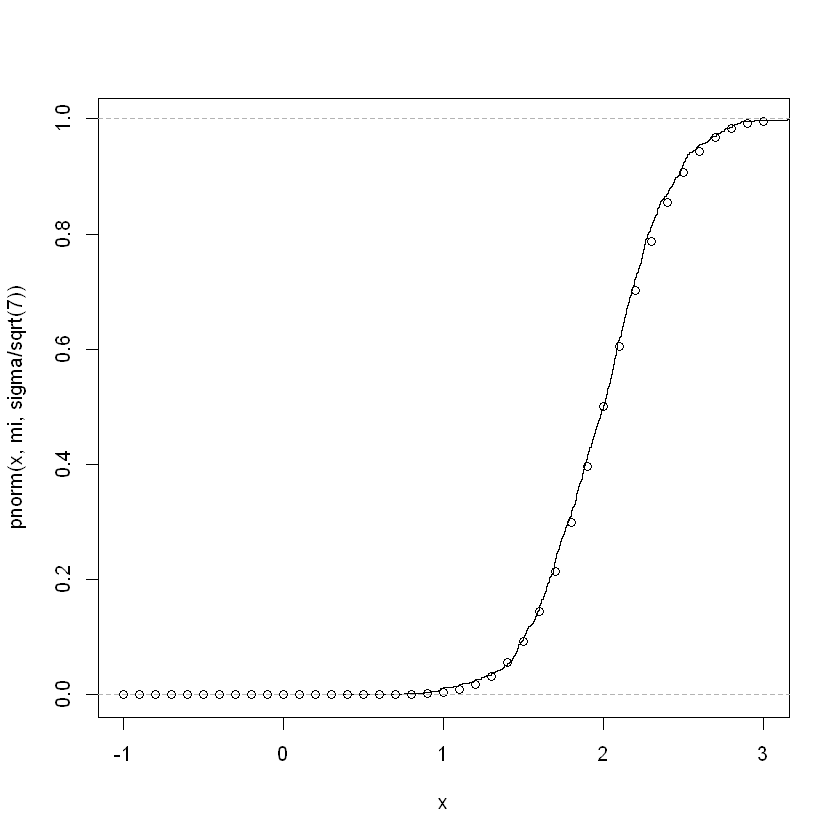

In [57]:
x <- seq(-1,3, 0.1)
plot(x, pnorm(x, mi, sigma/sqrt(7)))
lines(ecdf(Q1_vec))

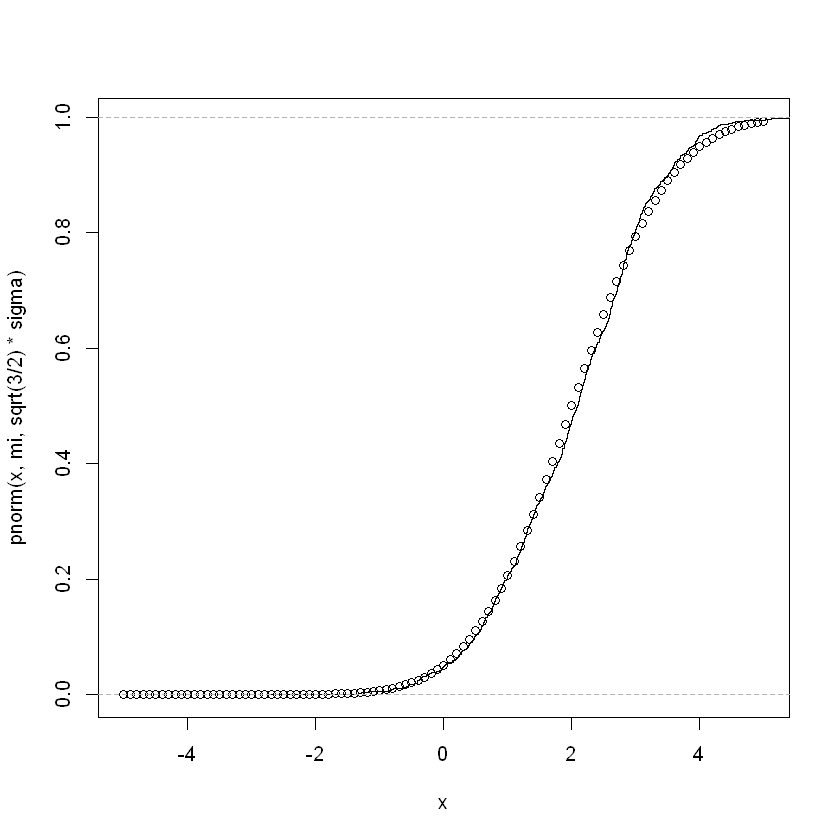

In [58]:
x <- seq(-5,5, 0.1)
plot(x, pnorm(x, mi, sqrt(3/2)*sigma))
lines(ecdf(Q2_vec))

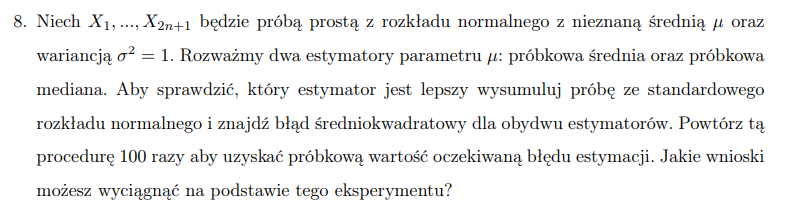

In [3]:
war <- 1
mi <- 5
N <- 1000
n <- 1001
MSE1 <- numeric()
MSE2 <- numeric()
for(k in 1:100){
      Q1 <- numeric()
      Q2 <- numeric()
      for(i in 1:N){
        X <- rnorm(n, mi, war)
        Q1[i] <- mean(X)
        Q2[i] <- median(X)
      }
        MSE1[k] <- 1/1000*sum((mi-Q1)^2)
        MSE2[k] <- 1/1000*sum((mi-Q2)^2)
      }
mean(MSE1)
mean(MSE2)

[1] 0.0009922079

[1] 0.001563218